## Product Delivery Time Prediction Using Machine Learning
#### This project aims to predict whether an e-commerce product will be delivered on time or not, based on various features. The ability to predict delays allows the company to optimize its operations and improve customer satisfaction.#### Problem Statment : E-commerce companies often face delays in product deliveries, leading to customer dissatisfaction. This project seeks to address that by building a machine learning model that predicts delivery times and examines factors affecting product delivery.


In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading Data

df = pd.read_csv("E_Commerce.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [4]:
#Checking the shape of the dataset
df.shape

(10999, 12)

In [5]:
#Checking data types of the columns
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [6]:
#Checking for null values
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
#Checking for duplicate values
df.duplicated().sum()

0

In [8]:
#Descriptive Statistics
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Text(0.5, 1.0, 'Reached on Time')

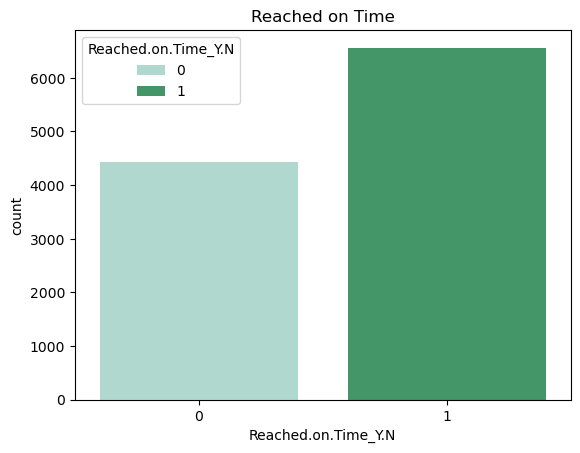

In [9]:
# Visualizing the distribution of delivery status
sns.countplot(x = 'Reached.on.Time_Y.N', data = df,hue='Reached.on.Time_Y.N', palette='BuGn').set_title('Reached on Time')

Text(0.5, 1.0, 'Gender Distribution')

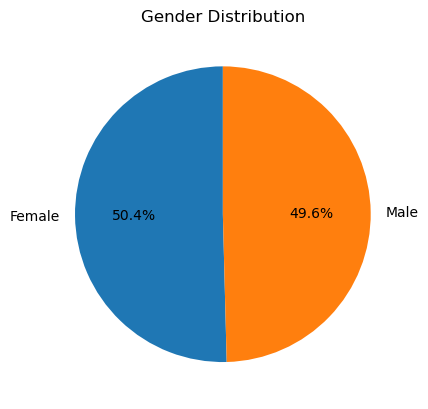

In [10]:
## Visualizing the distribution of Gender
plt.pie(df['Gender'].value_counts(),labels = ['Female','Male'],autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Cost of the Product')

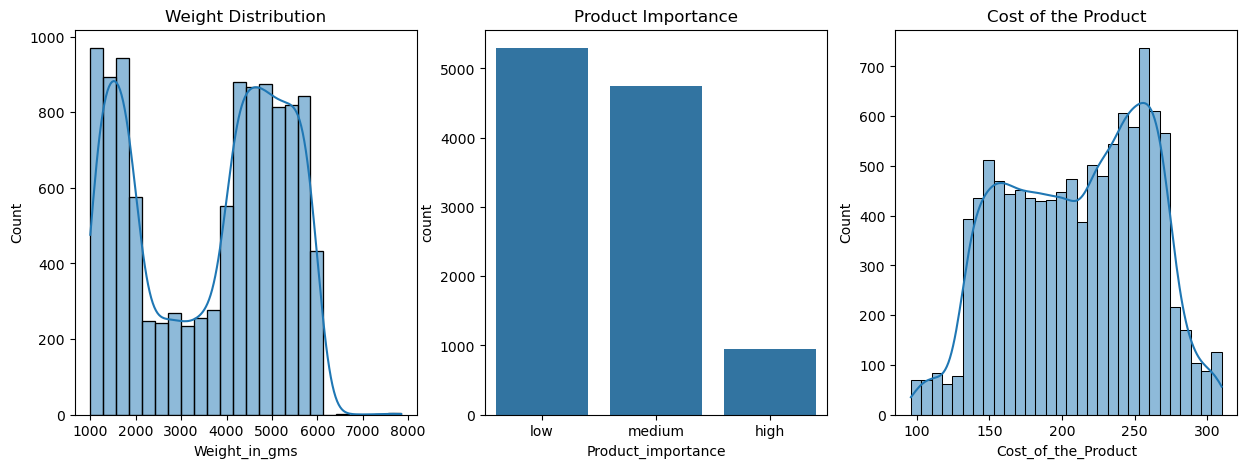

In [11]:
# Visualizing Product Properties
fig , ax = plt.subplots(1,3 , figsize = (15,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')

Text(0.5, 1.0, 'Mode of Shipment')

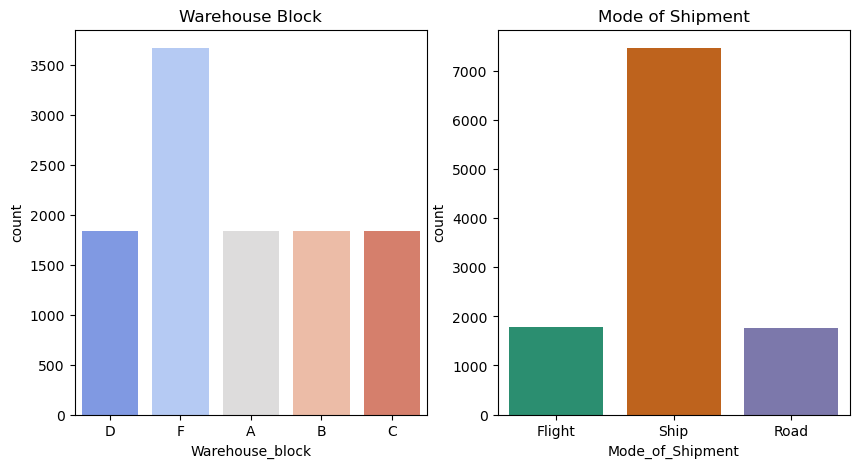

In [12]:
#Visualizing Logistics
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0],hue='Warehouse_block', palette='coolwarm').set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1],hue='Mode_of_Shipment', palette='Dark2').set_title('Mode of Shipment')

Text(0.5, 1.0, 'Discount Offered')

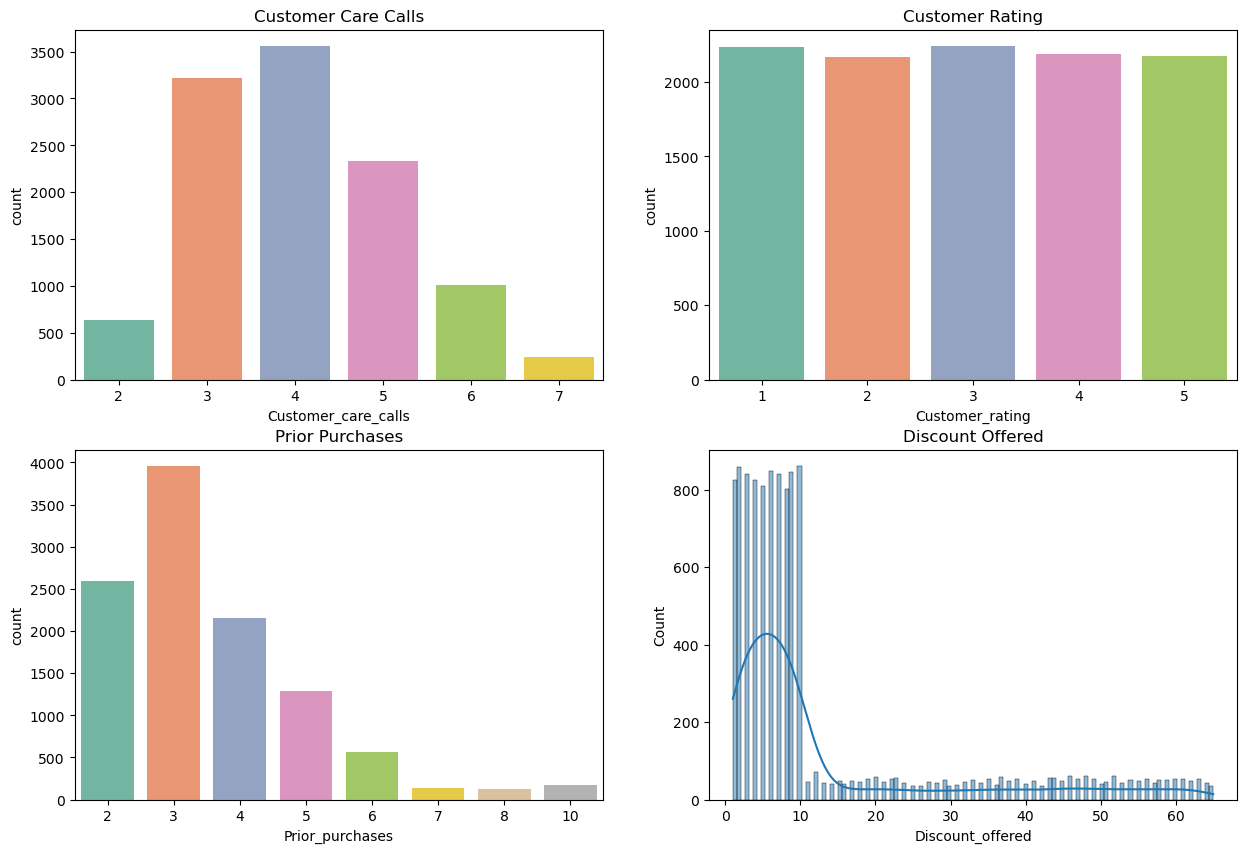

In [13]:
# Visualizing Customer Experience
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x='Customer_care_calls', data=df, ax=ax[0,0], hue='Customer_care_calls', palette='Set2', legend=False).set_title('Customer Care Calls')
sns.countplot(x='Customer_rating', data=df, ax=ax[0,1], hue='Customer_rating', palette='Set2', legend=False).set_title('Customer Rating')
sns.countplot(x='Prior_purchases', data=df, ax=ax[1,0], hue='Prior_purchases', palette='Set2', legend=False).set_title('Prior Purchases')
sns.histplot(x='Discount_offered', data=df, ax=ax[1,1], kde=True).set_title('Discount Offered')


Text(0.5, 1.0, 'Cost of the Product')

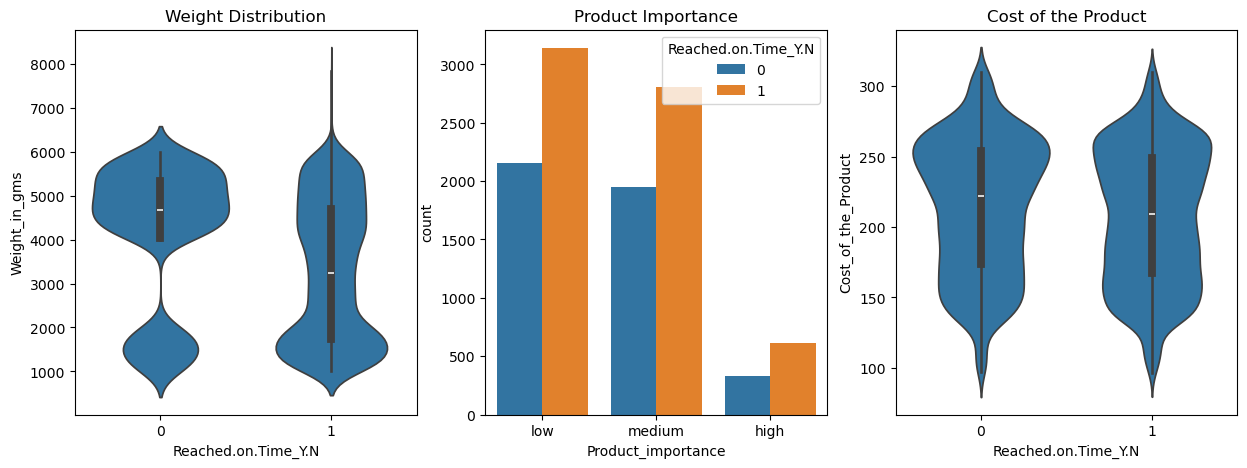

In [14]:
# Visualizing Product Properties vs Product Delivery
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.violinplot(y = df['Weight_in_gms'], ax=ax[0], x = df['Reached.on.Time_Y.N']).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Product Importance')
sns.violinplot(y = df['Cost_of_the_Product'], ax=ax[2], x = df['Reached.on.Time_Y.N']).set_title('Cost of the Product')

Text(0.5, 1.0, 'Mode of Shipment')

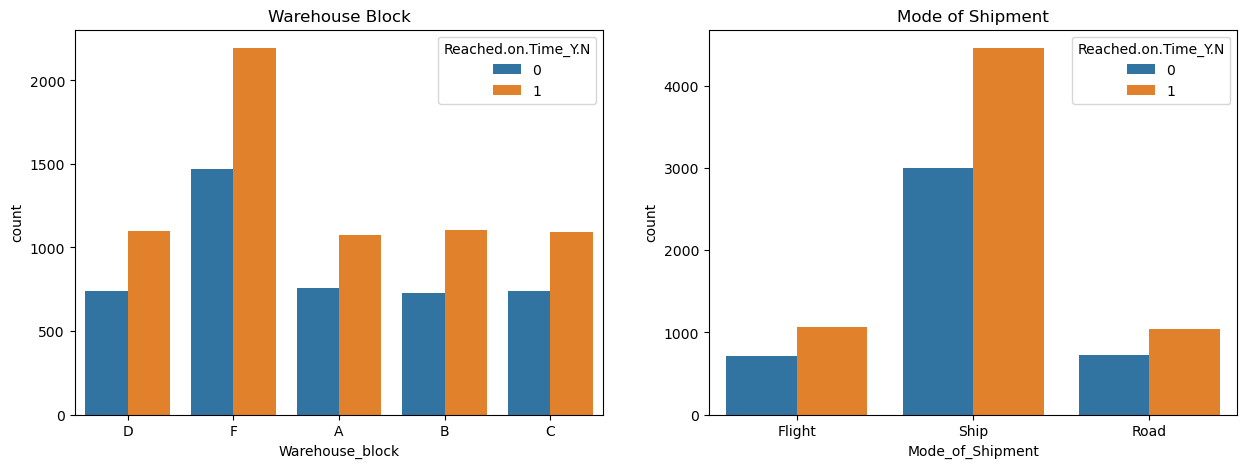

In [15]:
# Visualizing Logistics vs Product Delivery
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')

Text(0.5, 1.0, 'Discount Offered')

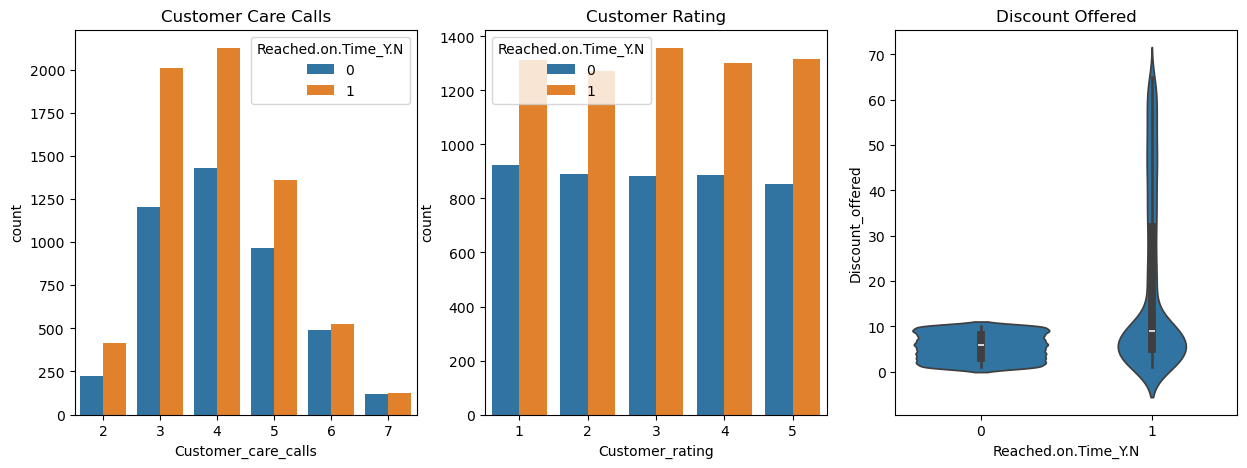

In [16]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[2]).set_title('Discount Offered')

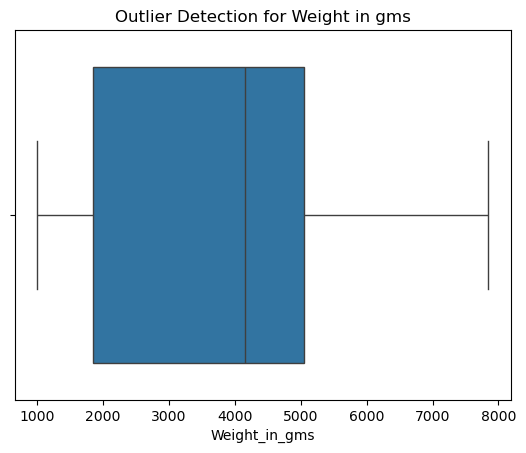

In [17]:
sns.boxplot(x=df['Weight_in_gms'])
plt.title('Outlier Detection for Weight in gms')
plt.show()

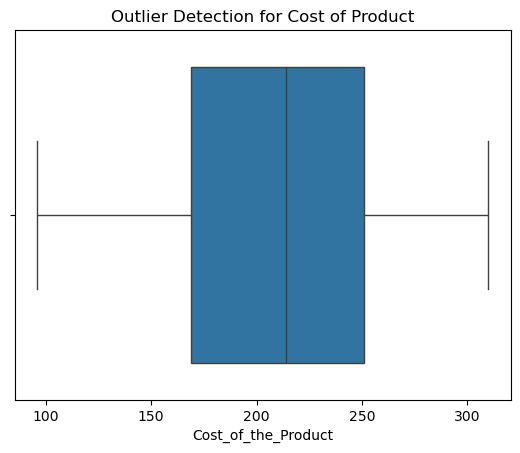

In [18]:
sns.boxplot(x=df['Cost_of_the_Product'])
plt.title('Outlier Detection for Cost of Product')
plt.show()

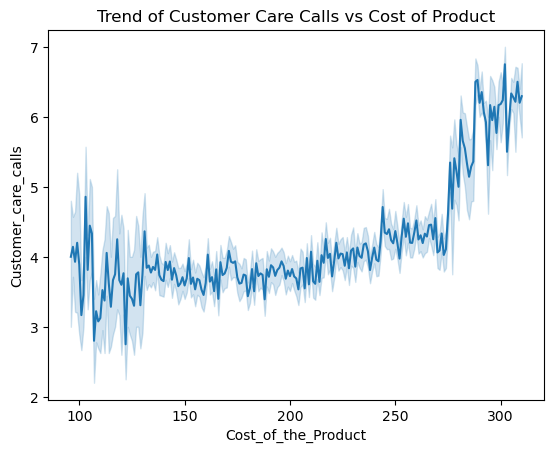

In [19]:
sns.lineplot(x='Cost_of_the_Product', y='Customer_care_calls', data=df)
plt.title('Trend of Customer Care Calls vs Cost of Product')
plt.show()

In [20]:
#LablingLabel Encoding the Categorical Variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ["Warehouse_block", "Mode_of_Shipment", "Product_importance", "Gender"]

for i in columns:
    df[i] = le.fit_transform(df[i])  
    print(f'{i}: {df[i].unique()}')

Warehouse_block: [3 4 0 1 2]
Mode_of_Shipment: [0 2 1]
Product_importance: [1 2 0]
Gender: [0 1]


<Axes: >

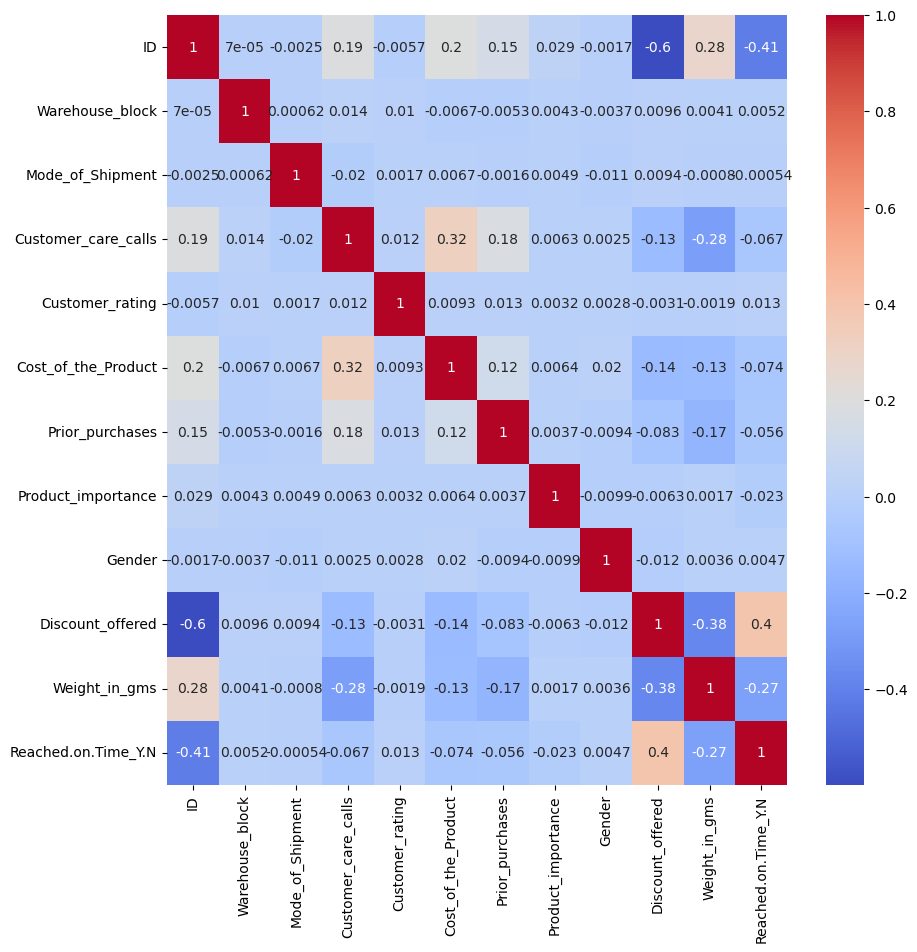

In [21]:
# Plotting Correlation Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [22]:
#Model Building using the following models:
#Logistic Regression
#Decision tree classifier
#Random forest classifiers
#K - Nearest Neighoburs
# SVC
# XGBoost Classifer

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV,StratifiedKFold

In [24]:
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=40)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [27]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=40),
    'Decision Tree': DecisionTreeClassifier(random_state=40),
    'Random Forest': RandomForestClassifier(random_state=40),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVC': SVC(probability=True, random_state=40),
    'XGBoost': XGBClassifier(random_state=40)
}

results = {}
cv_results = {}

for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    # Cross-validation (5-fold)
    cv_accuracy = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='accuracy').mean()
    cv_results[model_name] = cv_accuracy
    
    # Print the classification report for each model
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# Display accuracy comparison
print("Model Comparison Based on Accuracy:")
for model_name, accuracy in results.items():
    print(f"{model_name}: Test Accuracy = {accuracy:.4f}, Cross-Validation Accuracy = {cv_results[model_name]:.4f}")

# Select the best-performing model based on test accuracy or cross-validation accuracy
best_model_name = max(results, key=results.get)
print(f"\nThe best model based on test accuracy is: {best_model_name}")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.56      0.85      0.68       903
           1       0.84      0.53      0.65      1297

    accuracy                           0.66      2200
   macro avg       0.70      0.69      0.66      2200
weighted avg       0.72      0.66      0.66      2200

------------------------------------------------------------
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       903
           1       0.69      0.71      0.70      1297

    accuracy                           0.64      2200
   macro avg       0.63      0.62      0.62      2200
weighted avg       0.64      0.64      0.64      2200

------------------------------------------------------------
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.57      0.82      0

In [36]:
svc = SVC()
param_grid_svc = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}
svc_grid = GridSearchCV(svc, param_grid_svc, cv=StratifiedKFold(n_splits=5), scoring='accuracy', verbose=1)
svc_grid.fit(X_train, y_train)

print("Best SVC Parameters:", svc_grid.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best SVC Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


SVC Classification Report
              precision    recall  f1-score   support

           0       0.57      0.95      0.71       903
           1       0.94      0.49      0.65      1297

    accuracy                           0.68      2200
   macro avg       0.75      0.72      0.68      2200
weighted avg       0.78      0.68      0.67      2200



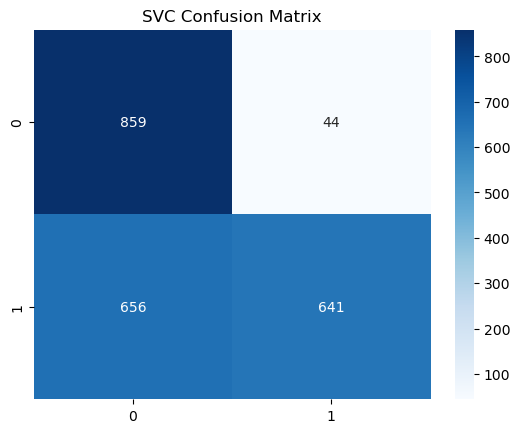

In [37]:
svc_pred = svc_grid.predict(X_test)

print("SVC Classification Report")
print(classification_report(y_test, svc_pred))

svc_cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVC Confusion Matrix')
plt.show()


In [40]:
# ROC-AUC Curve for SVC

svc_prob = svc_grid.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, svc_prob)
roc_auc = roc_auc_score(y_test, svc_prob)

plt.plot(fpr, tpr, label=f'SVC ROC Curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve for SVC
precision, recall, thresholds_pr = precision_recall_curve(y_test, svc_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVC')
plt.show()

AttributeError: This 'GridSearchCV' has no attribute 'predict_proba'